In [8]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np


In [17]:
def plot_r2_scores(json_file1, json_file2, dataset_name, regressor1_name, regressor2_name):
    # Load the JSON data
    with open(json_file1) as file1, open(json_file2) as file2:
        data1 = json.load(file1)
        data2 = json.load(file2)

    # Function to calculate average accuracy for each bucket
    def calculate_average_accuracy(data, buckets=10):
        average_accuracy = []
        for i in range(1, buckets+1):
            bucket_key = f"{i}_buckets"
            bucket_data = data.get(bucket_key, [])

            if bucket_data:
                accuracies = [entry["Accuracy"] for entry in bucket_data]
                avg_accuracy = np.mean(accuracies)
                average_accuracy.append(avg_accuracy)

        return average_accuracy

    # Function to calculate average R2 score for each bucket
    def calculate_average_r2(data, buckets=10):
        average_r2 = []
        for i in range(1, buckets+1):
            bucket_key = f"{i}_buckets"
            bucket_data = data.get(bucket_key, [])

            if bucket_data:
                r2_scores = [entry["R2"] for entry in bucket_data]
                avg_r2 = np.mean(r2_scores)
                average_r2.append(avg_r2)

        return average_r2

    # Compute average accuracy and R2 scores for each JSON file
    average_accuracy1 = calculate_average_accuracy(data1)
    average_accuracy2 = calculate_average_accuracy(data2)

    average_r2_1 = calculate_average_r2(data1)
    average_r2_2 = calculate_average_r2(data2)

    # Average the accuracies from the two JSON files
    combined_average_accuracy = [(a1 + a2) / 2 for a1, a2 in zip(average_accuracy1, average_accuracy2)]

    # Plot the average R2 scores and accuracy on the same plot
    plt.figure(figsize=(10, 6))
    # plt.plot(range(1, 11), combined_average_accuracy, marker='o', color='black', label='Accuracy')
    plt.plot(range(1, 11), average_r2_1, marker='o', color='blue', label=f'$R^2$ {regressor1_name}')
    plt.plot(range(1, 11), average_r2_2, marker='o', color='red', label=f'$R^2$ {regressor2_name}')
    plt.title(f"'{dataset_name}' Dataset | $R^2$ Score per Bucket")
    plt.xlabel('Bucket')
    plt.ylabel('$R^2$ Score')
    plt.ylim(0, 1)
    plt.xticks(range(1, 11))
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
def plot_accuracy_scores(json_file1, json_file2, dataset_name, regressor1_name, regressor2_name):
    # Load the JSON data
    with open(json_file1) as file1, open(json_file2) as file2:
        data1 = json.load(file1)
        data2 = json.load(file2)

    # Function to calculate average accuracy for each bucket
    def calculate_average_accuracy(data, buckets=10):
        average_accuracy = []
        for i in range(1, buckets+1):
            bucket_key = f"{i}_buckets"
            bucket_data = data.get(bucket_key, [])

            if bucket_data:
                accuracies = [entry["Accuracy"] for entry in bucket_data]
                avg_accuracy = np.mean(accuracies)
                average_accuracy.append(avg_accuracy)

        return average_accuracy

    # Function to calculate average R2 score for each bucket
    def calculate_average_r2(data, buckets=10):
        average_r2 = []
        for i in range(1, buckets+1):
            bucket_key = f"{i}_buckets"
            bucket_data = data.get(bucket_key, [])

            if bucket_data:
                r2_scores = [entry["R2"] for entry in bucket_data]
                avg_r2 = np.mean(r2_scores)
                average_r2.append(avg_r2)

        return average_r2

    # Compute average accuracy and R2 scores for each JSON file
    average_accuracy1 = calculate_average_accuracy(data1)
    average_accuracy2 = calculate_average_accuracy(data2)

    average_r2_1 = calculate_average_r2(data1)
    average_r2_2 = calculate_average_r2(data2)

    # Average the accuracies from the two JSON files
    combined_average_accuracy = [(a1 + a2) / 2 for a1, a2 in zip(average_accuracy1, average_accuracy2)]

    # Plot the average R2 scores and accuracy on the same plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), combined_average_accuracy, marker='o', color='black', label='Accuracy')
    # plt.plot(range(1, 11), average_r2_1, marker='o', color='blue', label=f'R2 {regressor1_name}')
    # plt.plot(range(1, 11), average_r2_2, marker='o', color='red', label=f'R2 {regressor2_name}')
    plt.title(f"'{dataset_name}' Dataset | Accuracy Score per Bucket")
    plt.xlabel('Bucket')
    plt.ylabel('Accuracy Score')
    plt.ylim(0, 1)
    plt.xticks(range(1, 11))
    plt.legend()
    plt.grid(True)
    plt.show()

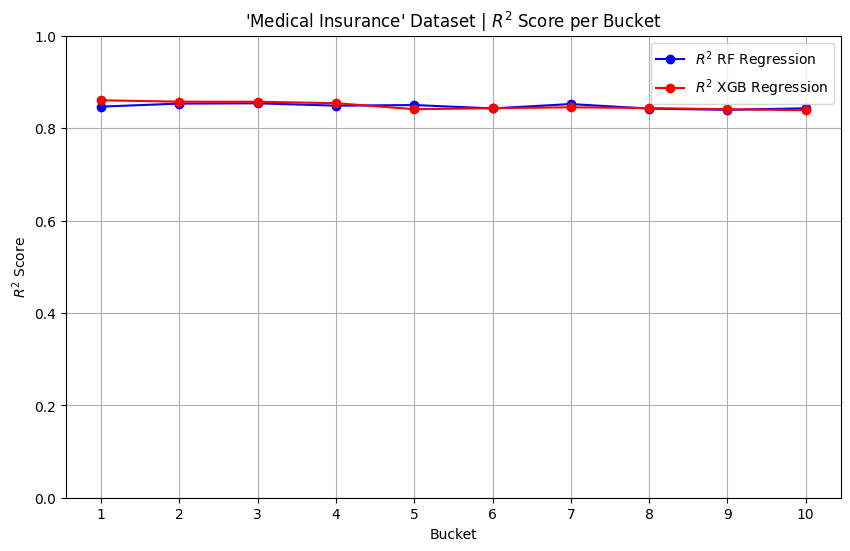

In [21]:
plot_r2_scores('/Users/ed/Documents/XAI/Projects/EIRegression/examples/RFRegression/results/insurance_3_breaks/results_15_buckets_50_iterations.json', 
                        '/Users/ed/Documents/XAI/Projects/EIRegression/examples/XGBRegression/results/insurance_3_breaks/results_15_buckets_50_iterations.json', 
                        'Medical Insurance', 
                        'RF Regression', 
                        'XGB Regression')

In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy_scores(json_files, dataset_names):
    # Function to calculate average accuracy for each bucket
    def calculate_average_accuracy(data, buckets=10):
        average_accuracy = []
        for i in range(1, buckets+1):
            bucket_key = f"{i}_buckets"
            bucket_data = data.get(bucket_key, [])
            
            if bucket_data:
                accuracies = [entry["Accuracy"] for entry in bucket_data]
                avg_accuracy = np.mean(accuracies)
                average_accuracy.append(avg_accuracy)

        return average_accuracy

    # Prepare to plot the accuracies for each dataset
    plt.figure(figsize=(10, 6))
    
    # Loop through each dataset's JSON file and dataset name
    for json_file, dataset_name in zip(json_files, dataset_names):
        # Load the JSON data
        with open(json_file) as file:
            data = json.load(file)

        # Compute the average accuracy for this dataset
        average_accuracy = calculate_average_accuracy(data)
        
        # Plot the accuracy for this dataset
        plt.plot(range(1, len(average_accuracy) + 1), 
                 average_accuracy, 
                 marker='o', 
                 label=f'{dataset_name} | Accuracy')
    
    # Finalize the plot
    plt.title(f"Average Accuracy Score per Bucket across Datasets")
    plt.xlabel('Bucket')
    plt.ylabel('Accuracy Score')
    plt.ylim(0, 1)
    plt.xticks(range(1, 11))
    plt.legend()
    plt.grid(True)
    plt.show()

# Example of how you would call the function
json_files = ['examples/XGBRegression/results/insurance_3_breaks/results_15_buckets_50_iterations.json',
              'examples/XGBRegression/results/movies_3_breaks/movies_results_15_buckets_50_iterations.json']
dataset_names = ["Medical Insurance 1", "Medical Insurance 2"]

plot_accuracy_scores(json_files, dataset_names)

FileNotFoundError: [Errno 2] No such file or directory: 'examples/XGBRegression/results/insurance_3_breaks/results_15_buckets_50_iterations.json'

<Figure size 1000x600 with 0 Axes>